<a href="https://colab.research.google.com/github/mshsu/probasets/blob/main/notebooks/actions_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Earthquakes Demo

The **exponential distribution** can be used to model time between instances of independent, regularly occuring events. Let's look at an example of this in *real time* US Geological Survey (USGS) earthquakes data from the past 30 days. (More info found [here](https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php). This data is updated every minute!) Can we model the time between 5.0+ magnitude earthquakes using the exponential distribution?

## Setup

In [2]:
!pip install symbulate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.8 MB/s eta 0:00:00


In [3]:
from symbulate import *
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [4]:
warnings.filterwarnings("ignore")

## Data

In [5]:
df_earthquakes = pd.read_csv("https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv")

df_earthquakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-05-22T03:00:54.486Z,3.1323,126.8268,35.000,4.6,mb,34.0,109.0,2.406,0.87,...,2023-05-22T03:16:40.040Z,"203 km NW of Tobelo, Indonesia",earthquake,5.97,1.929,0.105,27.0,reviewed,us,us
1,2023-05-22T02:45:36.132Z,26.8996,96.9828,10.000,5.0,mb,82.0,66.0,6.104,0.76,...,2023-05-22T03:01:23.040Z,"78 km NNE of Sarupathar, India",earthquake,9.55,1.853,0.053,113.0,reviewed,us,us
2,2023-05-21T22:20:05.361Z,29.8307,129.1834,189.392,5.5,mww,72.0,53.0,1.999,1.02,...,2023-05-22T00:26:18.174Z,"129 km WSW of Kurio, Japan",earthquake,7.43,7.210,0.071,19.0,reviewed,us,us
3,2023-05-21T21:11:41.551Z,-52.2014,139.6900,10.000,5.4,mww,38.0,68.0,10.623,0.86,...,2023-05-21T23:15:20.731Z,west of Macquarie Island,earthquake,11.92,1.815,0.086,13.0,reviewed,us,us
4,2023-05-21T19:56:44.276Z,28.4543,104.8517,10.000,4.7,mb,78.0,77.0,7.150,0.62,...,2023-05-21T21:07:42.040Z,"13 km E of Xunchang, China",earthquake,7.21,1.768,0.056,96.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,2023-04-22T08:23:42.298Z,-5.2523,125.5903,5.524,6.2,mww,163.0,37.0,4.359,0.53,...,2023-05-03T09:27:59.590Z,Banda Sea,earthquake,6.69,3.100,0.052,35.0,reviewed,us,us
529,2023-04-22T06:05:14.392Z,-22.2638,-179.5454,573.161,4.7,mb,152.0,52.0,4.181,0.62,...,2023-05-03T07:48:33.040Z,south of the Fiji Islands,earthquake,9.23,8.097,0.047,135.0,reviewed,us,us
530,2023-04-22T05:04:20.980Z,22.5085,118.5090,8.543,4.5,mb,40.0,74.0,1.950,0.42,...,2023-05-03T07:26:56.438Z,"160 km SW of Magong, Taiwan",earthquake,6.40,5.046,0.115,22.0,reviewed,us,us
531,2023-04-22T04:23:47.665Z,-23.2695,-179.7497,543.701,4.7,mb,22.0,124.0,4.702,1.04,...,2023-05-12T21:47:28.040Z,south of the Fiji Islands,earthquake,12.77,11.676,0.108,26.0,reviewed,us,us


## Wrangling

In [6]:
# Filter to magnitude 5 and above
df_mag5 = df_earthquakes[df_earthquakes["mag"]>=5.5]
# Change the datatype of the time variable from string to something called datetime to make it easier to work with
df_mag5["datetime"] = pd.to_datetime(df_mag5["time"])
# Sort the values by date, with oldest earthquake first
df_mag5 = df_mag5[["datetime", "mag"]].sort_values(by="datetime", ignore_index=True)

# Find the time since the last 5.0+ earthquake for each earthquake except for the first one
time_before = [0] + list(pd.to_numeric(df_mag5["datetime"]))[:-1]
df_mag5["intertime"] = pd.to_numeric(df_mag5["datetime"])-pd.Series(time_before)
df_mag5["intertime_str"] = df_mag5["intertime"].apply(pd.Timedelta)
# Get date and time for each occurrence
df_mag5["date"] = df_mag5["datetime"].dt.date
df_mag5["time"] = df_mag5["datetime"].dt.time
# Filter variables down to the ones we want
df_mag5=df_mag5.iloc[1:][["date", "time", "mag", "intertime", "intertime_str"]]

df_mag5

,date,time,mag,intertime,intertime_str
1,2023-04-22,09:15:54.527000,5.50,3132229000000,0 days 00:52:12.229000
2,2023-04-22,16:17:42.585000,5.60,25308058000000,0 days 07:01:48.058000
3,2023-04-22,17:09:44.702000,5.80,3122117000000,0 days 00:52:02.117000
4,2023-04-22,21:17:47.741000,5.70,14883039000000,0 days 04:08:03.039000
5,2023-04-24,00:41:53.607000,7.10,98645866000000,1 days 03:24:05.866000
6,2023-04-24,02:17:56.596000,5.60,5762989000000,0 days 01:36:02.989000
7,2023-04-24,20:00:57.565000,7.10,63780969000000,0 days 17:43:00.969000
8,2023-04-25,11:12:24.833000,5.50,54687268000000,0 days 15:11:27.268000
9,2023-04-26,00:14:00.660000,5.70,46895827000000,0 days 13:01:35.827000
10,2023-04-28,01:07:48.772000,5.70,176028112000000,2 days 00:53:48.112000


## Rate/Average

In [7]:
beta = df_mag5["intertime"].mean()
lambd = 1/(beta/(1000000000*60*60*24))

print('Avg Time btwn Occurrences: %s\nRate: %.4f 5.0+ mag earthquakes per day'
      % (pd.Timedelta(beta), lambd))

Avg Time btwn Occurrences: 0 days 16:08:05.978704545
Rate: 1.4875 5.0+ mag earthquakes per day


## Exponential Distribution

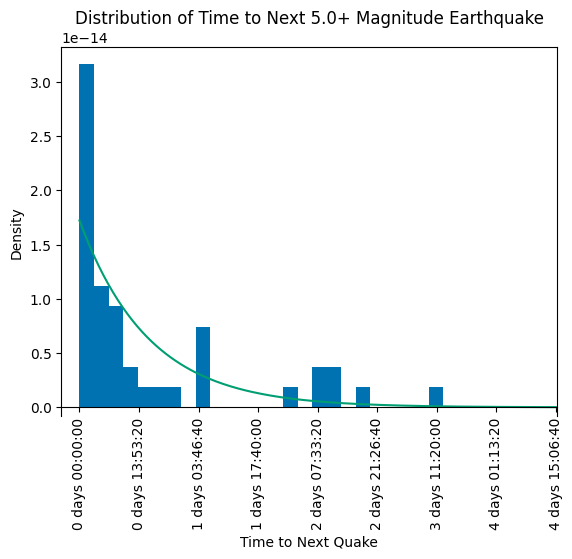

In [8]:
# Plotting the observed data
df_mag5["intertime"].hist(density=True, bins=25, grid=False)
# Plotting the theoretical distribution
Exponential(rate=1/beta).plot()

# Cosmetic stuff
ax = plt.gca()
plt.ylabel(ylabel="Density")
plt.xlabel(xlabel="Time to Next Quake")
plt.title(label="Distribution of Time to Next 5.0+ Magnitude Earthquake")
xticks = [str(pd.Timedelta(i)) for i in ax.get_xticks()]
ax.set_xticklabels(xticks)
plt.xticks(rotation=90)
xlims = ax.get_xlim()
plt.show()

## Poisson Distribution

In [20]:
# Get frequency of appropriate quakes by date
df_counts = df_mag5["date"]
df_counts = df_counts.value_counts()
df_counts = df_counts.to_frame()
df_counts = df_counts.reset_index()
# df_counts = df_counts.rename(columns={ "date": "freq", "index": "date"})
# df_counts = df_counts.sort_values(by="date", ignore_index=True)

# However, the df_counts we just generated doesn't contain days with 0 quakes.
# We need to fix this by generating rows for dates with 0 quakes.
# First, let's find the start and end dates.
start_date = df_counts['index'].min()
end_date = df_counts['index'].max()

# Change the datatype of existing date data to string (for better merging)
df_counts['index'] = df_counts['index'].astype(str)
# Here we generate a dataframe with all dates
all_dates = pd.DataFrame(pd.date_range(start_date, end_date - pd.Timedelta(days = 1), freq='d')).rename(columns={0: 'index'}).astype(str)
# Here we merge the df_counts with the table with all dates
# Then we fill in 0s for dates with no quakes
df_counts = pd.merge(how='left', left=all_dates, right=df_counts, on='index').fillna(0)
df_counts['date'] = df_counts['date'].astype(int)

df_counts

,index,date
0,2023-04-22,4
1,2023-04-23,0
2,2023-04-24,3
3,2023-04-25,1
4,2023-04-26,1
5,2023-04-27,0
6,2023-04-28,7
7,2023-04-29,0
8,2023-04-30,0
9,2023-05-01,2


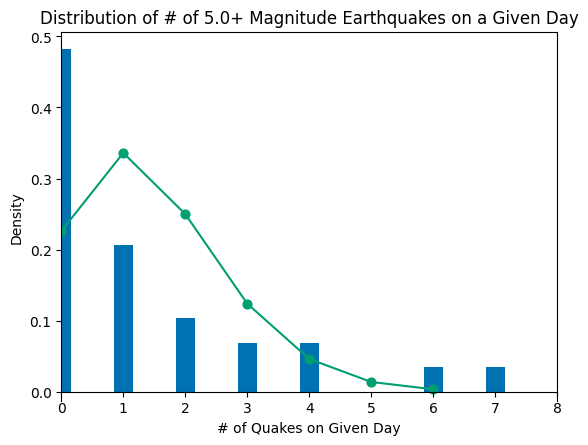

In [21]:
# This makes it so our histogram bar centers line up with the dots on the theoretical distribution
bin_edges=[i+0.5 for i in list(range(min(df_counts["date"])-1, max(df_counts["date"])+1, 1))]

# This is the number of days in our timeframe
t=1
# This is our Poisson parameter mu
mu=lambd*t

# Plotting the observed data
df_counts["date"].hist(density=True, bins=bin_edges, rwidth=0.3, grid=False)
# Plotting the theoretical distribution
Poisson(mu).plot()

# Cosmetic stuff
plt.ylabel(ylabel="Density")
plt.xlabel(xlabel="# of Quakes on Given Day")
plt.title(label="Distribution of # of 5.0+ Magnitude Earthquakes on a Given Day")
plt.xlim((0,max(df_counts["date"])+1))
plt.show()